# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-04-02 15:39:30--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-04-02 15:39:31--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [2]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [3]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [ ]:
print("Cantidad de valores nulos por columna:")
print(df.isnull().sum())

Cantidad de valores nulos por columna:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [31]:
df['Valor Total compra']=df['quantity']*df['price']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Segmento_Edad,Género,Segmento_Categoria,Categoria,Segmento_Comb,Valor Total compra
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,Joven,Mujer,Ropa,Ropa,Joven_Ropa,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,Joven,Hombre,Zapatos,Zapatos,Joven_Zapatos,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,Joven,Hombre,Ropa,Ropa,Joven_Ropa,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,Mayor,Mujer,Zapatos,Zapatos,Mayor_Zapatos,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,Adulto,Mujer,Libros,Libros,Adulto_Libros,242.40


In [ ]:
import pandas as pd
import datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
df['Antiguedad'] = (datetime.datetime(2025,1,1) - df['invoice_date']).dt.days / 365
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Valor total,Valor Total,Antiguedad
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,7502.00,2.410959
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,5401.53,3.057534
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,300.08,3.147945
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,15004.25,3.632877
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,242.40,3.191781


## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

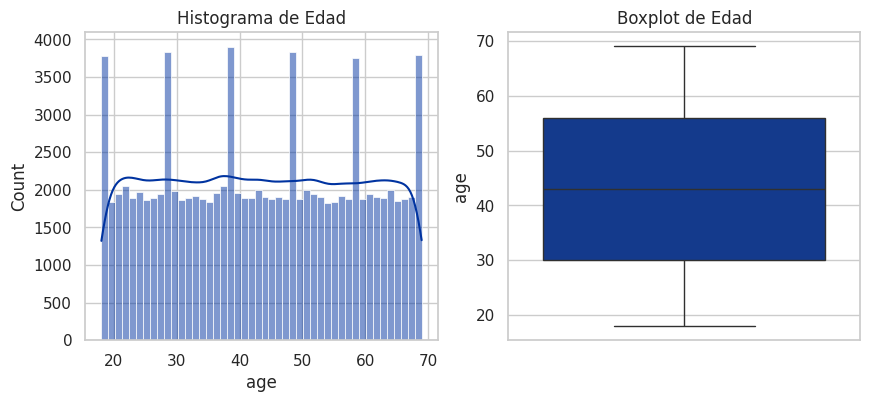

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df['age'], kde=True)
plt.title(f'Histograma de Edad')

plt.subplot(1,2,2)
sns.boxplot(y=df['age'])
plt.title(f'Boxplot de Edad')

plt.show()

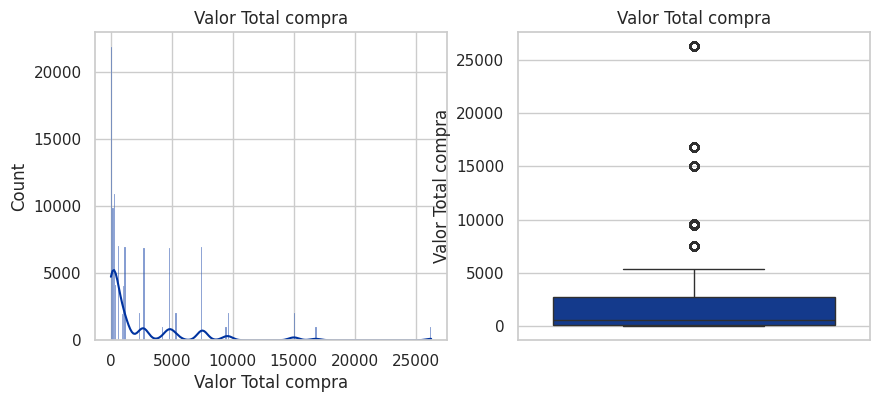

In [32]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['Valor Total compra'], kde=True)
plt.title(f'Valor Total compra')

plt.subplot(1,2,2)
sns.boxplot(y=df['Valor Total compra'])
plt.title(f'Valor Total compra')

plt.show()

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [12]:
bins_edad = [0, 35, 55, 120]
labels_edad = ['Joven', 'Adulto', 'Mayor']
df['Segmento_Edad'] = pd.cut(df['age'], bins=bins_edad, labels=labels_edad)

In [13]:
df['Género'] = df['gender'].replace({
                  'Female': 'Mujer',
                  'Male': 'Hombre',
                })


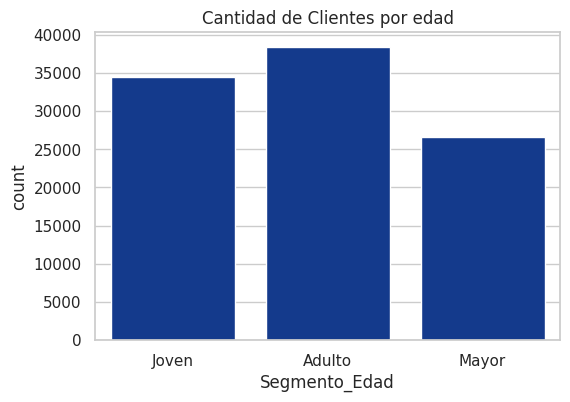

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Segmento_Edad', data=df)
plt.title('Cantidad de Clientes por edad')
plt.show()

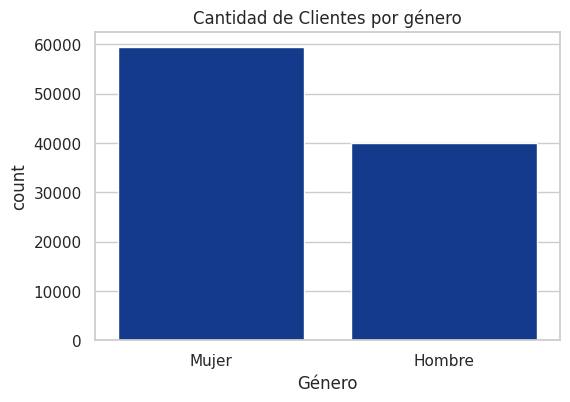

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Género', data=df)
plt.title('Cantidad de Clientes por género')
plt.show()

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

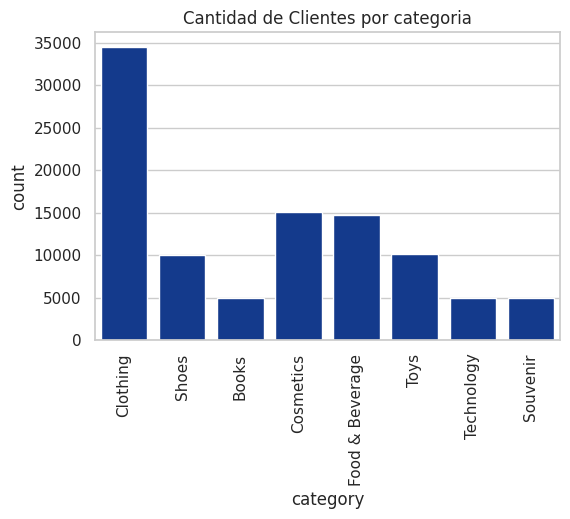

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='category', data=df)
plt.title('Cantidad de Clientes por categoria')
plt.xticks(rotation=90)
plt.show()

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

Tabla cruzada (Edad vs Categoria):
Segmento_Categoria  Comidas y Bebidas  Cosméticos  Juguetes  Libros   Ropa  \
Segmento_Edad                                                                
Joven                            5126        5171      3533    1708  11951   
Adulto                           5715        5868      3872    1921  13320   
Mayor                            3935        4058      2682    1352   9216   

Segmento_Categoria  Souvenir  Tecnología  Zapatos  
Segmento_Edad                                      
Joven                   1738        1713     3478  
Adulto                  1894        1982     3880  
Mayor                   1367        1301     2676  


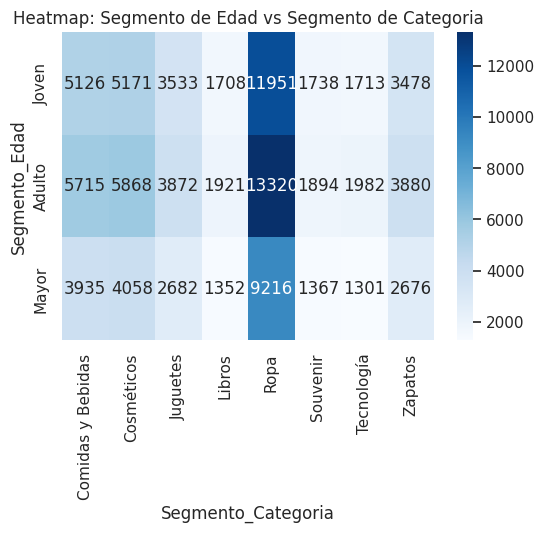

In [21]:
df['Categoria'] = df['category'].replace({
                  'Books': 'Libros',
                  'Clothing': 'Ropa',
                  'Shoes': 'Zapatos',
                  'Cosmetics': 'Cosméticos',
                  'Food & Beverage': 'Comidas y Bebidas',
                  'Toys': 'Juguetes',
                  'Souvenirs': 'Souvenirs',
                  'Technology': 'Tecnología',
                })


df['Segmento_Categoria'] = df['Categoria']
tabla_segmentos = pd.crosstab(df['Segmento_Edad'], df['Segmento_Categoria'])
print("Tabla cruzada (Edad vs Categoria):")
print(tabla_segmentos)

plt.figure(figsize=(6,4))
sns.heatmap(tabla_segmentos, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap: Segmento de Edad vs Segmento de Categoria')
plt.show()


## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [22]:
def asignar_segmento(row):
    return f"{row['Segmento_Edad']}_{row['Segmento_Categoria']}"

df['Segmento_Comb'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['Segmento_Comb'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Comb', 'Cantidad']
seg_counts

,Segmento_Comb,Cantidad
0,Adulto_Ropa,13320
1,Joven_Ropa,11951
2,Mayor_Ropa,9216
3,Adulto_Cosméticos,5868
4,Adulto_Comidas y Bebidas,5715
5,Joven_Cosméticos,5171
6,Joven_Comidas y Bebidas,5126
7,Mayor_Cosméticos,4058
8,Mayor_Comidas y Bebidas,3935
9,Adulto_Zapatos,3880


## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

Lugar de compra por Segmento Combinado:
               Segmento_Comb      shopping_mall
0   Adulto_Comidas y Bebidas          Metrocity
1          Adulto_Cosméticos       Istinye Park
2            Adulto_Juguetes       Istinye Park
3              Adulto_Libros             Kanyon
4                Adulto_Ropa       Metropol AVM
5            Adulto_Souvenir        Cevahir AVM
6          Adulto_Tecnología             Kanyon
7             Adulto_Zapatos  Emaar Square Mall
8    Joven_Comidas y Bebidas        Cevahir AVM
9           Joven_Cosméticos   Mall of Istanbul
10            Joven_Juguetes        Cevahir AVM
11              Joven_Libros  Emaar Square Mall
12                Joven_Ropa             Kanyon
13            Joven_Souvenir       Istinye Park
14          Joven_Tecnología       Metropol AVM
15             Joven_Zapatos     Forum Istanbul
16   Mayor_Comidas y Bebidas  Emaar Square Mall
17          Mayor_Cosméticos       Metropol AVM
18            Mayor_Juguetes          Metrocity


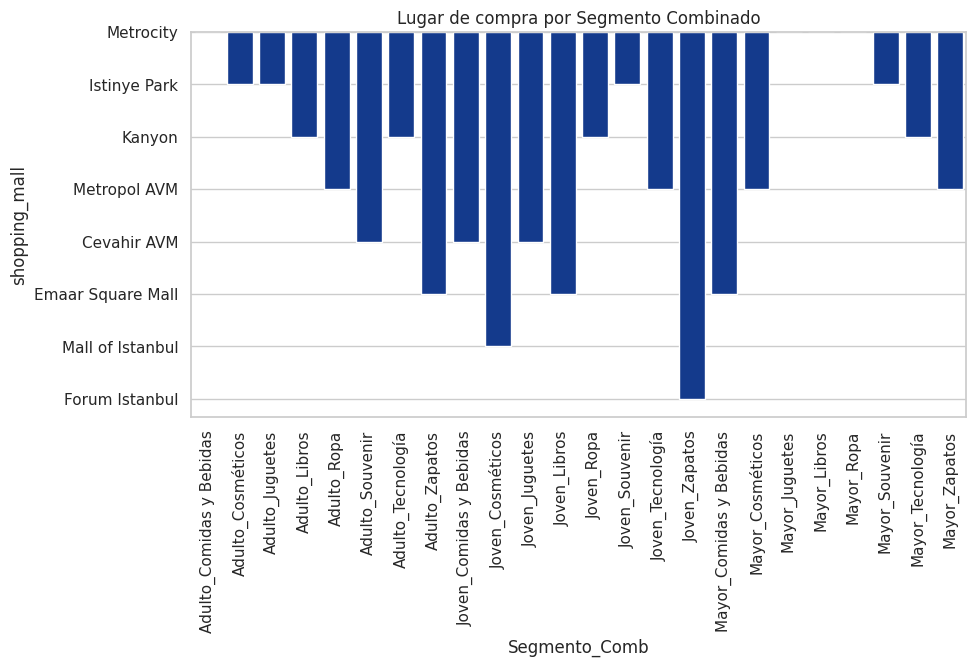

In [30]:

lugarcompra_segmentos = df.groupby('Segmento_Comb')['shopping_mall'].agg('first').reset_index()
print("Lugar de compra por Segmento Combinado:")
print(lugarcompra_segmentos)

plt.figure(figsize=(10,5))
sns.barplot(x='Segmento_Comb', y='shopping_mall', data=lugarcompra_segmentos)
plt.title('Lugar de compra por Segmento Combinado')
plt.xticks(rotation=90)
plt.show()

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

Valor Total compra promedio por Segmento Combinado:
               Segmento_Comb  Valor Total compra_Promedio
0   Adulto_Comidas y Bebidas                    57.680997
1          Adulto_Cosméticos                   450.294949
2            Adulto_Juguetes                   390.778182
3              Adulto_Libros                   164.662598
4                Adulto_Ropa                  3324.850354
5            Adulto_Souvenir                   123.041135
6          Adulto_Tecnología                 11682.441978
7             Adulto_Zapatos                  6682.459838
8    Joven_Comidas y Bebidas                    57.501432
9           Joven_Cosméticos                   450.955649
10            Joven_Juguetes                   394.037113
11              Joven_Libros                   172.521956
12                Joven_Ropa                  3276.976046
13            Joven_Souvenir                   131.439442
14          Joven_Tecnología                 11182.224168
15             Joven

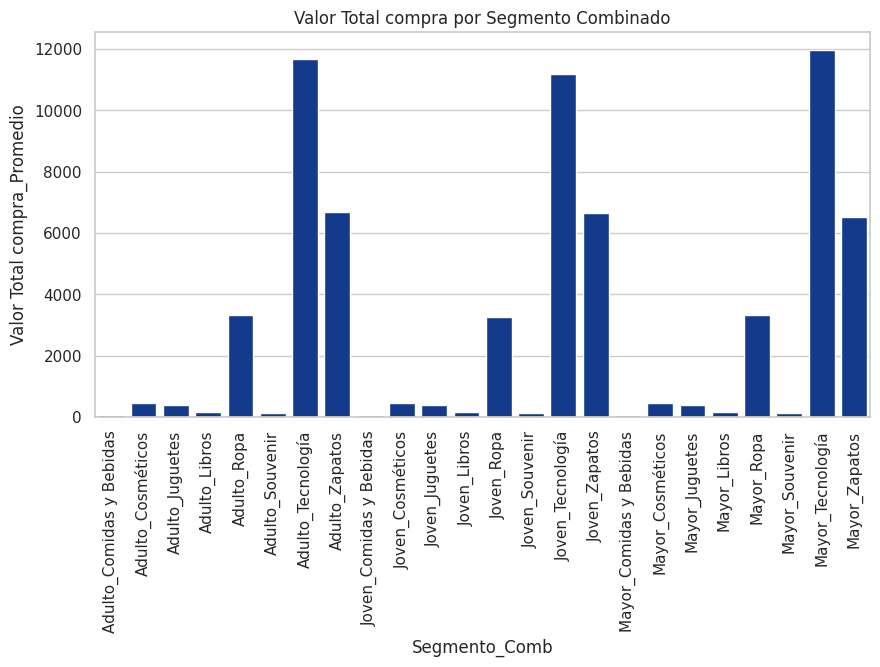

In [36]:
promedio_segmentos = df.groupby('Segmento_Comb')['Valor Total compra'].mean().reset_index()
promedio_segmentos.columns = ['Segmento_Comb', 'Valor Total compra_Promedio']
print("Valor Total compra promedio por Segmento Combinado:")
print(promedio_segmentos)

plt.figure(figsize=(10,5))
sns.barplot(x='Segmento_Comb', y='Valor Total compra_Promedio', data=promedio_segmentos)
plt.title('Valor Total compra por Segmento Combinado')
plt.xticks(rotation=90)
plt.show()

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

In [ ]:
Los segmentos que tienen mayor potencial en términos de valor son en primer lugar la tecnología, seguido de los zapatos y finalmente la ropa. En cuanto a frecuencia de compra,

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!